# AutoEncoder
https://blog.csdn.net/sherryhwang/article/details/124664589                        
其实AutoEncoder就是非常简单的DNN。在encoder中神经元随着层数的增加逐渐变少，也就是降维的过程。而在decoder中神经元随着层数的增加逐渐变多，也就是升维的过程


如果编码器和解码器够大，很容易造成过拟合，loss 为 0 的那种
所有图片的像素信息都存在解码器里，编码器就是给输入图片找到它对应的编号，解码器就根据编号找到图片的像素信息，直接输出出来。可以想象：编码器编的编号有没有意义都无所谓、大小也无所谓，反正一切像素信息（最基础的、最不抽象的信息）都保存在解码器里了。

In [20]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt 
import numpy as np
import torchvision


In [7]:
train_data = datasets.MNIST("./datasets/", 
                            download=True, 
                            train=True, 
                            transform=transforms.Compose([
                                transforms.ToTensor()
                            ]))

test_data = datasets.MNIST('./datasets/', 
                           train=False, 
                           download=True, 
                           transform=transforms.Compose([
                               transforms.ToTensor()
                            ]))


In [8]:
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

In [9]:
x,y = iter(train_loader).next()
print(x.shape)

torch.Size([32, 1, 28, 28])


torch.Size([32, 1, 28, 28])
tensor([8, 5, 1, 3, 2, 4, 8, 0, 4, 6, 1, 8, 7, 7, 9, 2, 5, 0, 9, 8, 6, 9, 1, 7,
        4, 3, 7, 2, 2, 6, 8, 4])
torch.Size([3, 122, 242])


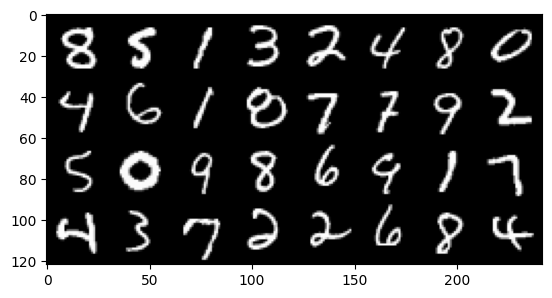

In [21]:
# functions to show an image

def imshow(img):
    """show some imgs in datasets
        !!YOU CAN READ THIS CODE LATER!! """
    
    npimg = img.numpy() # convert tensor to numpy
    plt.imshow(np.transpose(npimg, (1, 2, 0))) # [channel, height, width] -> [height, width, channel]
    plt.show()
print(x.shape)
print(y)
print(torchvision.utils.make_grid(x).shape)
imshow(torchvision.utils.make_grid(x))

In [27]:
device = torch.device('cuda')
epochs = 10


## 定义模型

In [28]:
class Encoder(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784,256),
            nn.ReLU(inplace=True),
            nn.Linear(256,64),
            nn.ReLU(inplace=True),
            nn.Linear(64,20),
            nn.ReLU(inplace=True)
        )
        
    def forward(self, x):
        return self.encoder(x)
    
class Decoder(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.decoder = nn.Sequential(
            nn.Linear(20,64),
            nn.ReLU(inplace=True),
            nn.Linear(64,256),
            nn.ReLU(inplace=True),
            nn.Linear(256,784),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        return self.decoder(x)

class AutoEncoder(nn.Module):
    def __init__(self, encoder, decoder) -> None:
        super().__init__()
        self.encoder = encoder
        self.decoder = decoder
        
    def forward(self, x:torch.Tensor):
        x = x.flatten(1) # start_dim
        x = self.encoder(x)
        x = self.decoder(x)
        
        x = x.view(-1,1,28,28)
        return x


In [29]:
model = AutoEncoder(encoder=Encoder(), decoder=Decoder()).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criteon = nn.MSELoss()
# vis = visdom.Visdom()

0 loss: 0.009552530013024807


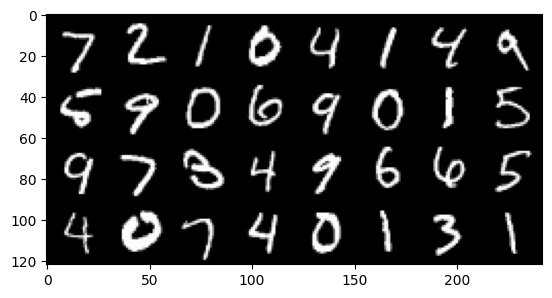

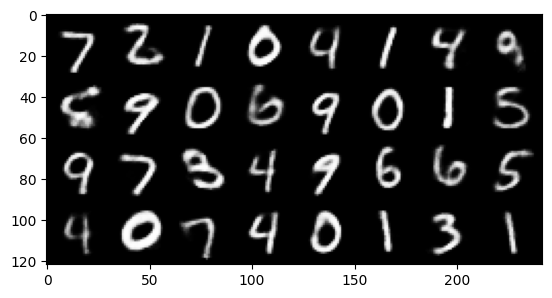

1 loss: 0.01450505293905735


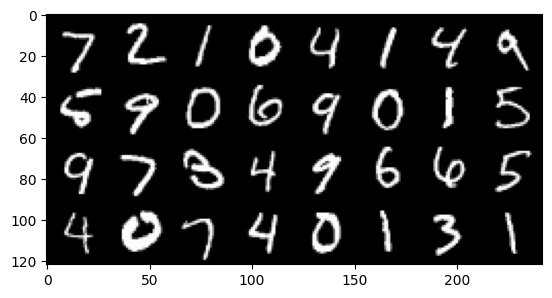

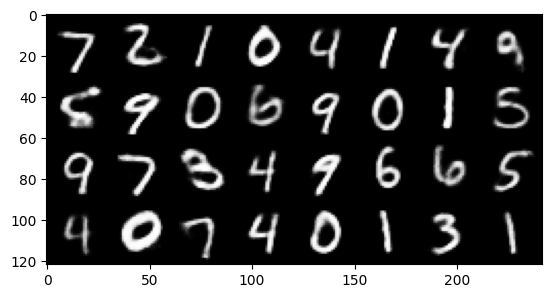

2 loss: 0.012523846700787544


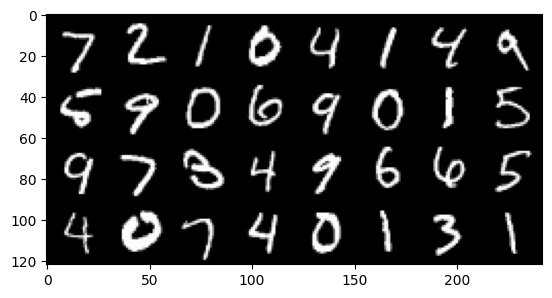

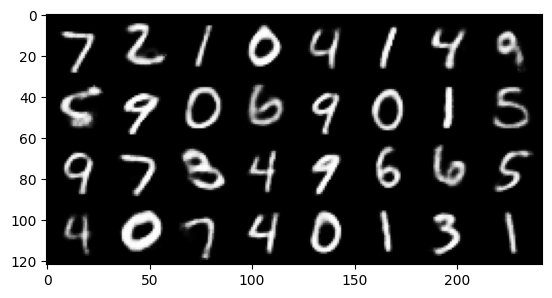

3 loss: 0.012346423231065273


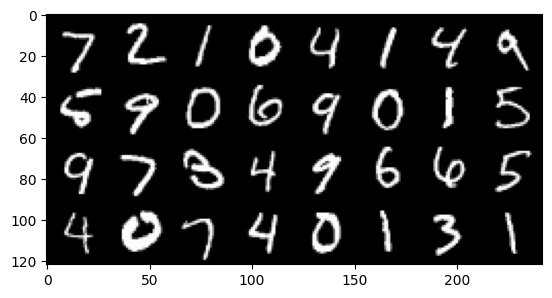

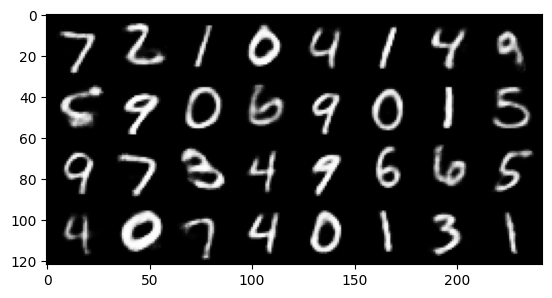

4 loss: 0.011347091756761074


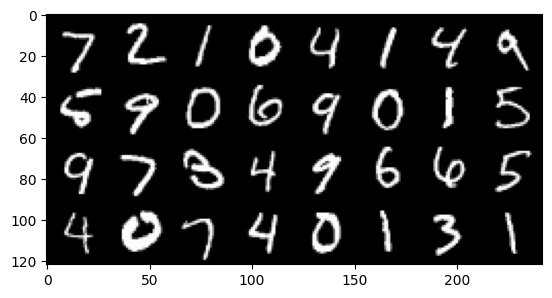

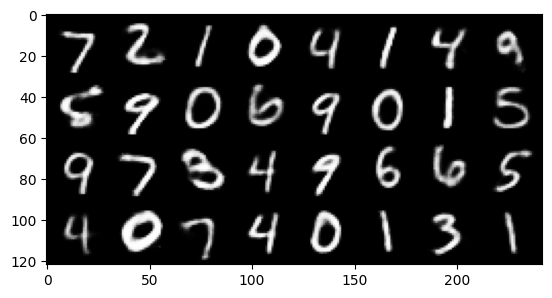

5 loss: 0.012624598108232021


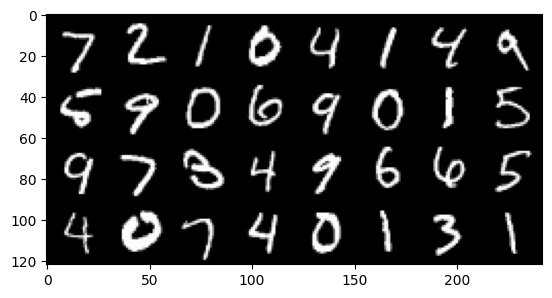

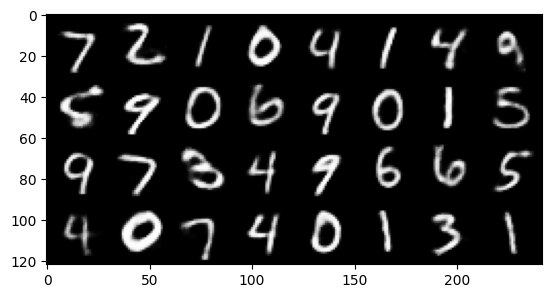

6 loss: 0.012325948104262352


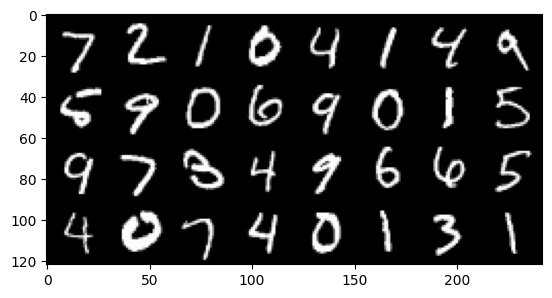

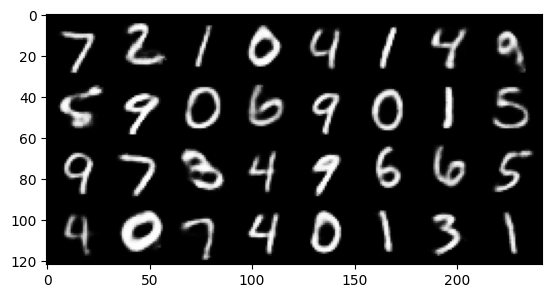

7 loss: 0.011662660166621208


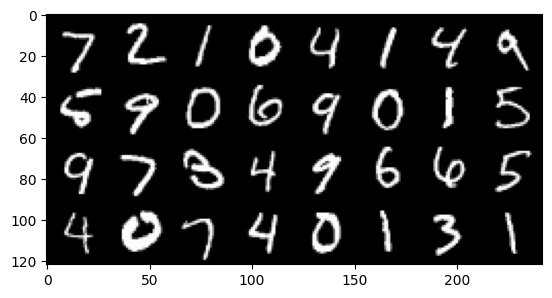

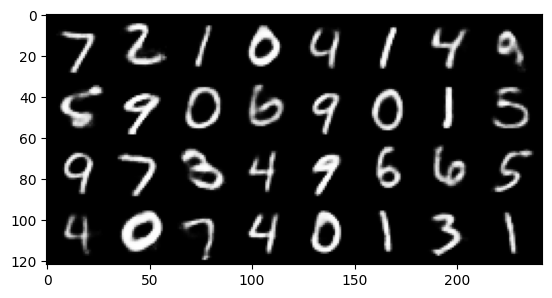

8 loss: 0.011104985140264034


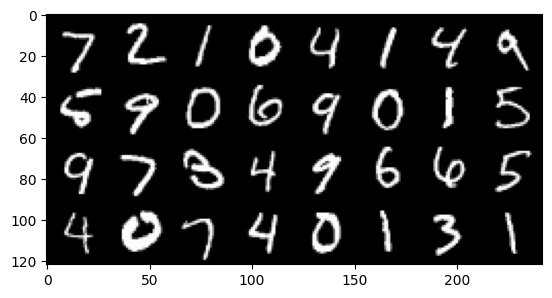

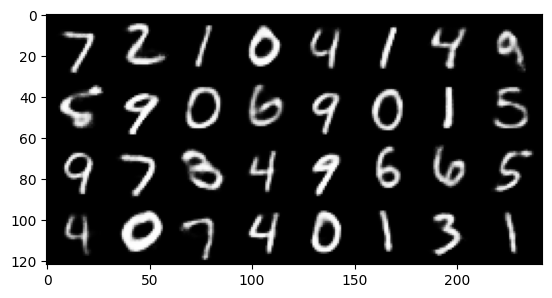

9 loss: 0.011418540962040424


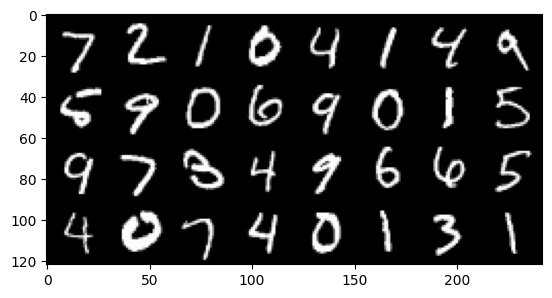

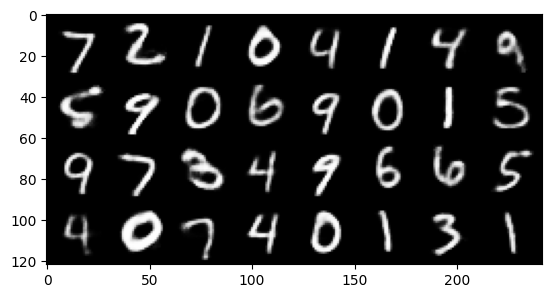

In [34]:

for epoch in range(epochs):
    for batch_idx, (x,y) in enumerate(train_loader):
        optimizer.zero_grad()
        x,y = x.to(device), y.to(device)
        x_hat = model(x)
        loss = criteon(x_hat, x)      
        loss.backward()
        optimizer.step()
    print(epoch, 'loss:', loss.item())
    x, y = iter(test_loader).next()
    with torch.no_grad():
        x_hat = model(x.to(device))
    imshow(torchvision.utils.make_grid(x.cpu()))
    imshow(torchvision.utils.make_grid(x_hat.cpu()))

    